Exercício Aula 4

https://github.com/TrainingByPackt/Applied-Data-Science-with-Python-and-Jupyter/tree/master/Lesson%201

---
### Python Libraries
---

In [121]:
# Common standard libraries

import datetime
import time
import os

In [122]:
# Common external libraries

import pandas as pd
import numpy as np
import sklearn # scikit-learn
import requests
from bs4 import BeautifulSoup

In [123]:
# Visualization libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# Setting plot appearance
# See here for more options: https://matplotlib.org/users/customizing.html

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

In [125]:
# Ignore warnings (don't display stderr)

import warnings
warnings.filterwarnings('ignore')

---
## Analysis: the Boston Housing Dataset   
We explore the Boston housing dataset, which contains US census data concerning houses in various areas around the city of Boston.



---
### Loading the data

---

In [126]:
from sklearn import datasets
boston = datasets.load_boston()

In [127]:
type(boston)

sklearn.utils.Bunch

In [128]:
from sklearn.utils import Bunch


In [129]:
# What fields are in the dictionary?
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [130]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [131]:
import pandas as pd

In [132]:
# What does the data look like?
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [133]:
boston['data'].shape

(506, 13)

In [134]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [135]:
# Load the data
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [136]:
# Still need to add the target variable
boston['target'].shape

(506,)

In [137]:
df['MEDV'] = boston['target']

In [138]:
# Move the target variable to the front of the table
y = df.MEDV.copy()
del df['MEDV']
df = pd.concat((y, df), axis=1)

In [139]:
df.head()

MEDV     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  24.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  21.6  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  34.7  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  33.4  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  36.2  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [140]:
df.tail()

MEDV     CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  22.4  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  20.6  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  23.9  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  22.0  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  11.9  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88

In [141]:
len(df)

506

In [142]:
df.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [143]:
# Identify and NaNs
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [144]:
# Removing some columns
for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
    del df[col]

---
### Data exploration
---

In [145]:
df.describe().T

count        mean         std        min         25%        50%  \
MEDV   506.0   22.532806    9.197104    5.00000   17.025000   21.20000   
CRIM   506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
INDUS  506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS   506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
RM     506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE    506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS    506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
TAX    506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
LSTAT  506.0   12.653063    7.141062    1.73000    6.950000   11.36000   

              75%       max  
MEDV    25.000000   50.0000  
CRIM     3.677083   88.9762  
INDUS   18.100000   27.7400  
CHAS     0.000000    1.0000  
RM       6.623500    8.7800  
AGE     94.075000  100.0000  
DIS      5.188425   12.1265  
TAX    666.000000  711.0000  
LSTAT   16.955000   37.9700

In [146]:
# Focus on these columns
cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'MEDV']

In [147]:
# Subset
df[cols].head()

RM   AGE    TAX  LSTAT  MEDV
0  6.575  65.2  296.0   4.98  24.0
1  6.421  78.9  242.0   9.14  21.6
2  7.185  61.1  242.0   4.03  34.7
3  6.998  45.8  222.0   2.94  33.4
4  7.147  54.2  222.0   5.33  36.2

In [148]:
# The pairwise correlations
df[cols].corr()

RM       AGE       TAX     LSTAT      MEDV
RM     1.000000 -0.240265 -0.292048 -0.613808  0.695360
AGE   -0.240265  1.000000  0.506456  0.602339 -0.376955
TAX   -0.292048  0.506456  1.000000  0.543993 -0.468536
LSTAT -0.613808  0.602339  0.543993  1.000000 -0.737663
MEDV   0.695360 -0.376955 -0.468536 -0.737663  1.000000

In [149]:
# Set up plotting environment

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting plot appearance
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

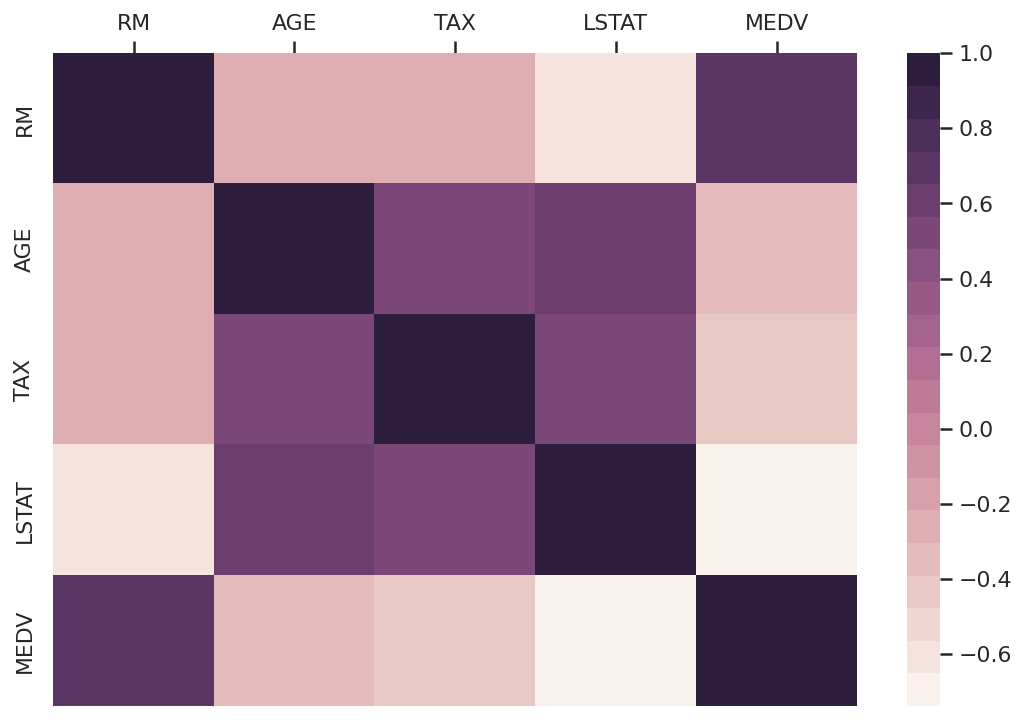

In [150]:
# Pairwise correlation heatmap

ax = sns.heatmap(df[cols].corr(),
                 cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
ax.xaxis.tick_top() # move labels to the top

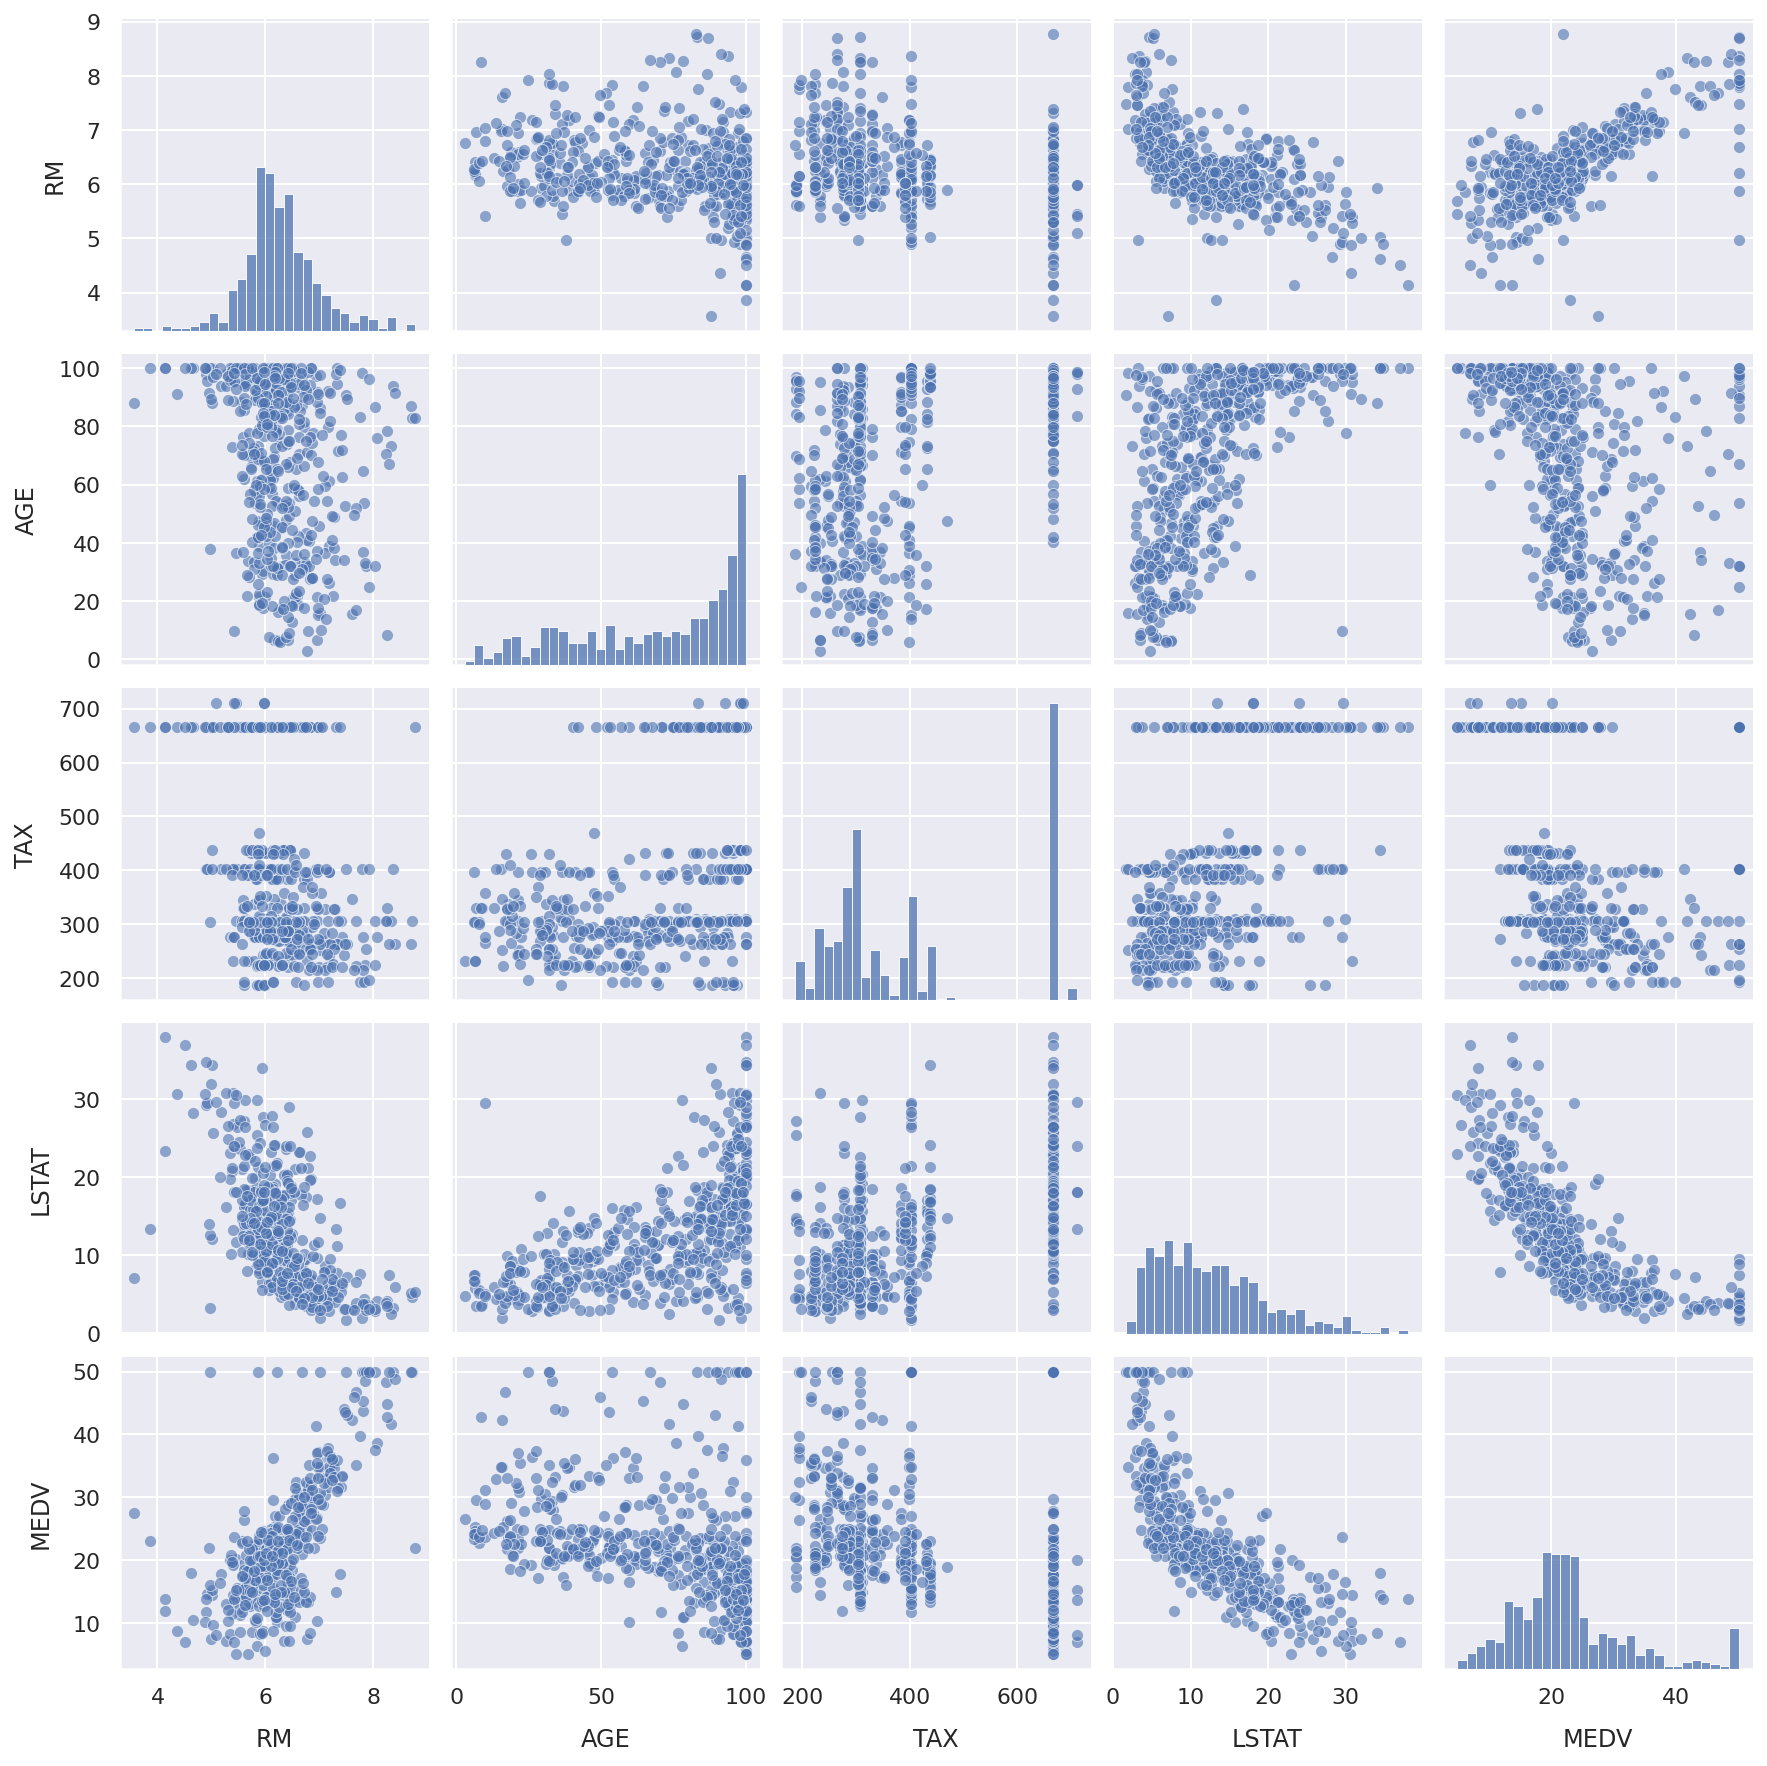

In [151]:
sns.pairplot(df[cols],
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})

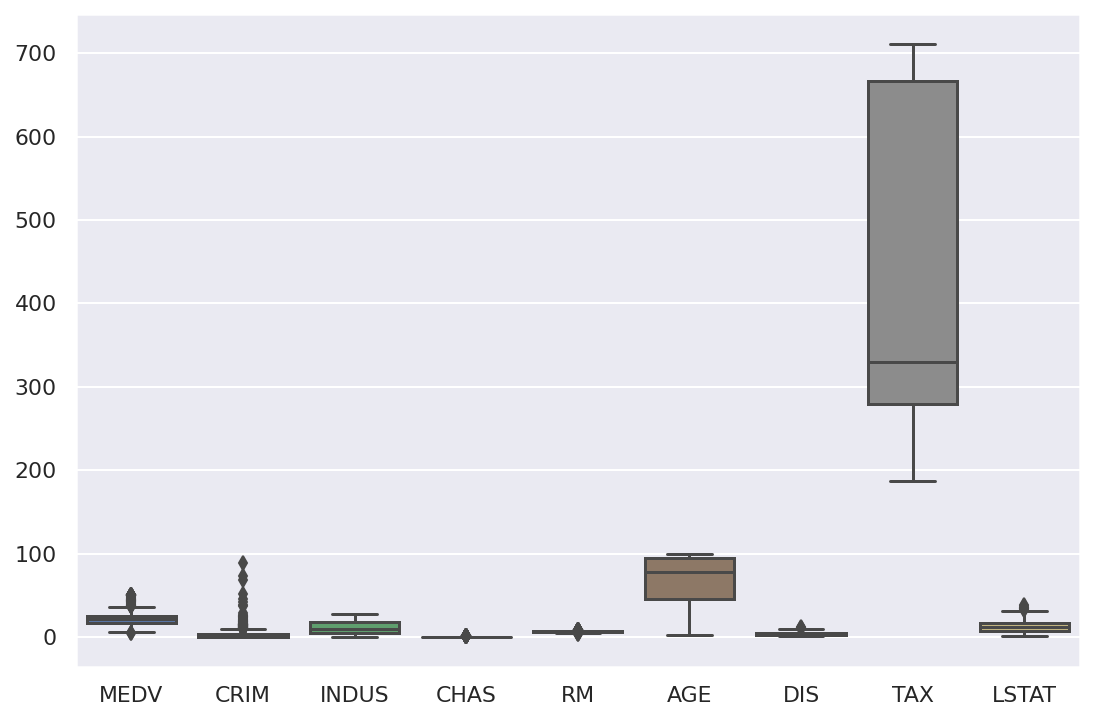

In [152]:
sns.boxplot(data=df)

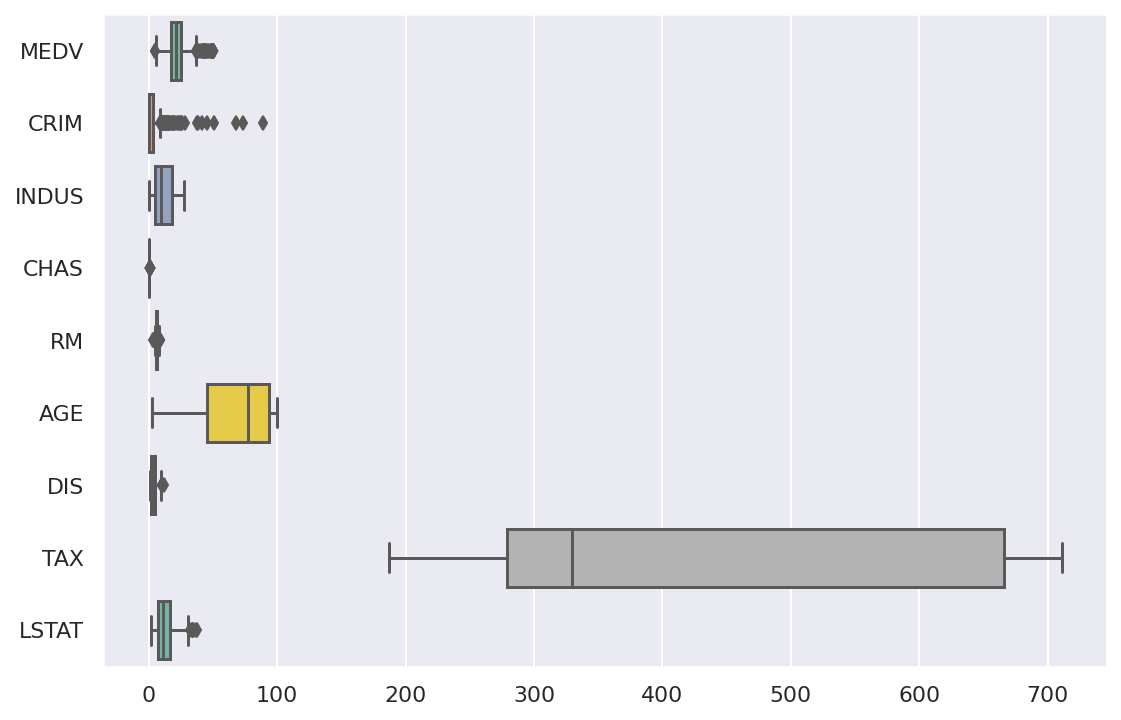

In [153]:
sns.boxplot(data=df, orient="h", palette="Set2")

In [154]:
df.head()

MEDV     CRIM  INDUS  CHAS     RM   AGE     DIS    TAX  LSTAT
0  24.0  0.00632   2.31   0.0  6.575  65.2  4.0900  296.0   4.98
1  21.6  0.02731   7.07   0.0  6.421  78.9  4.9671  242.0   9.14
2  34.7  0.02729   7.07   0.0  7.185  61.1  4.9671  242.0   4.03
3  33.4  0.03237   2.18   0.0  6.998  45.8  6.0622  222.0   2.94
4  36.2  0.06905   2.18   0.0  7.147  54.2  6.0622  222.0   5.33

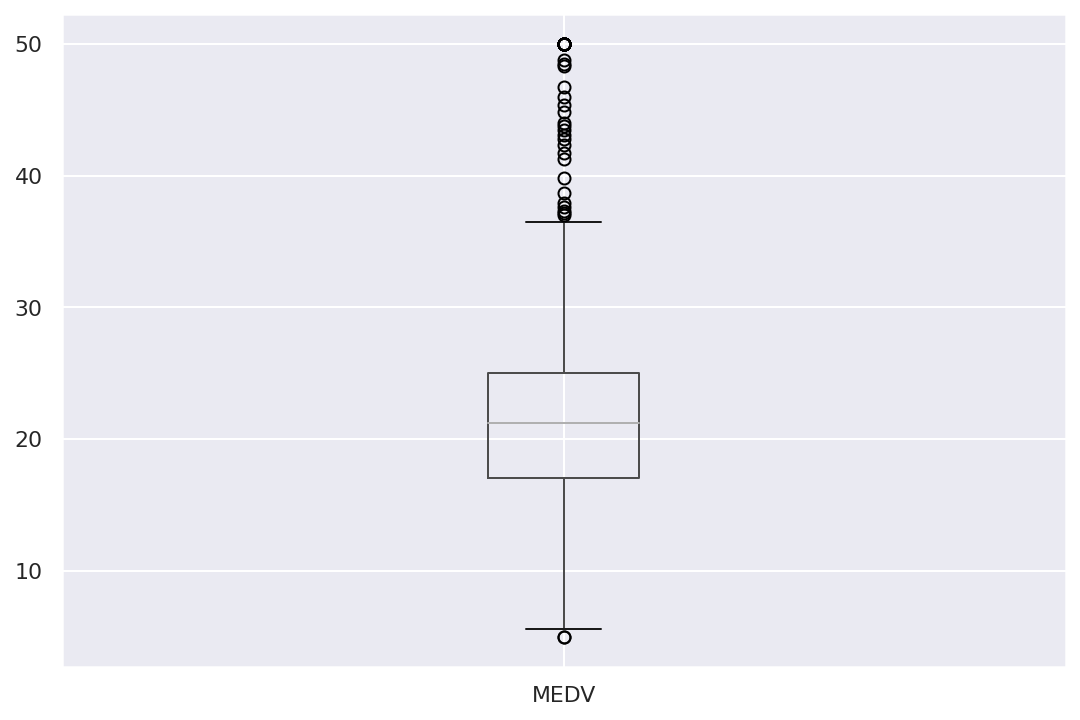

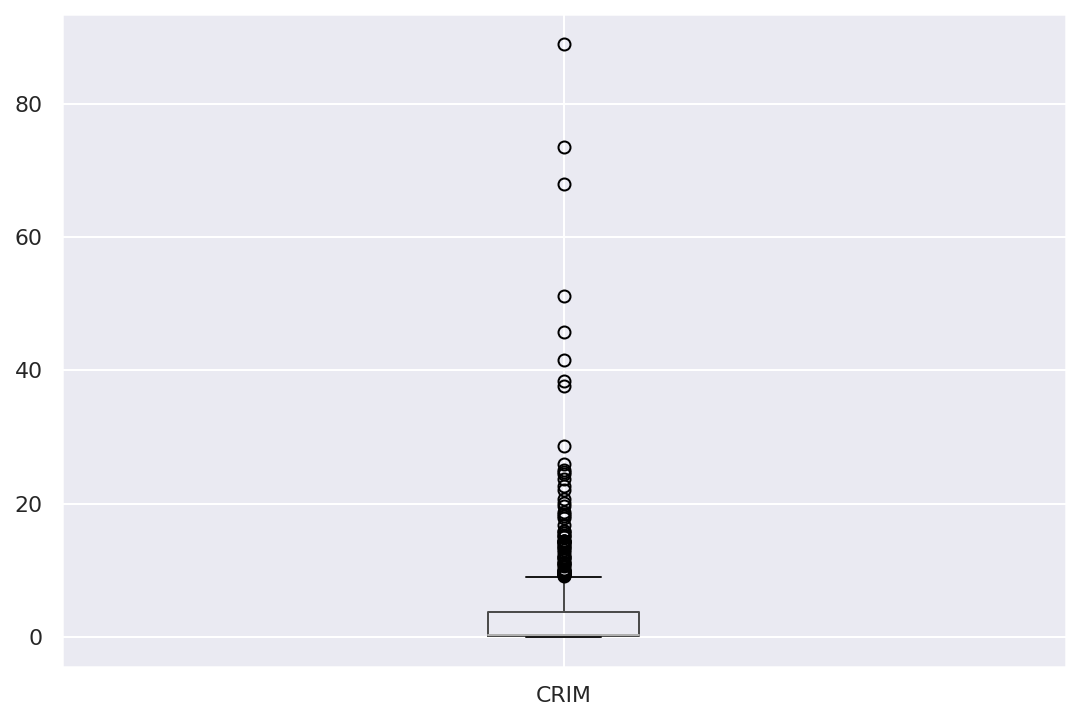

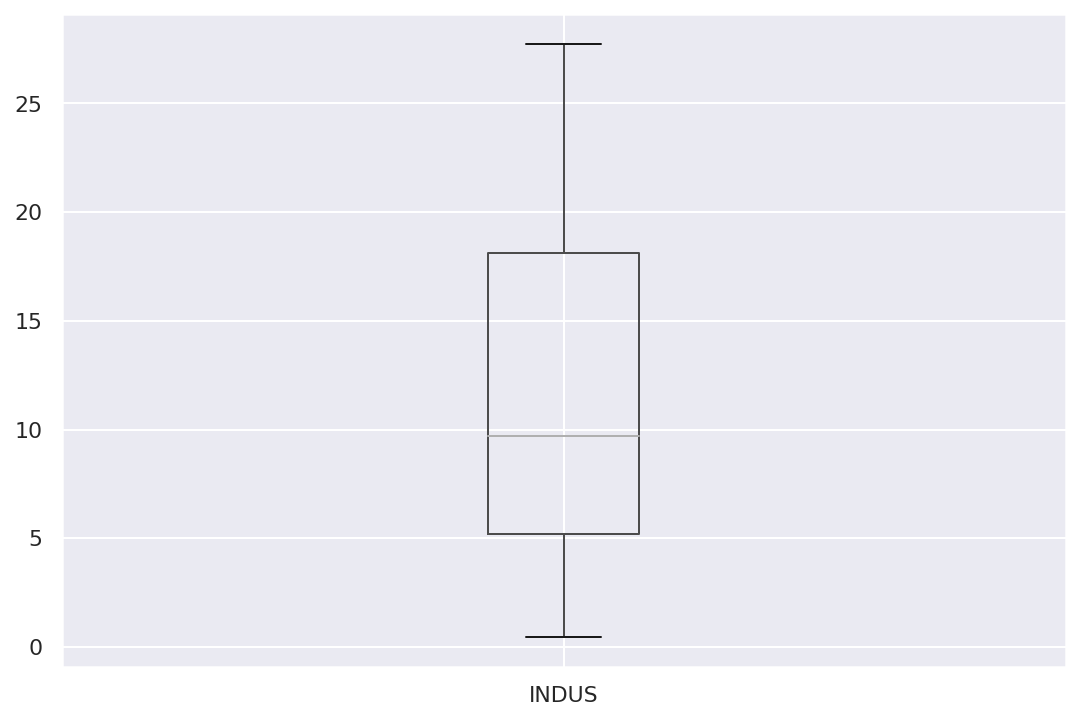

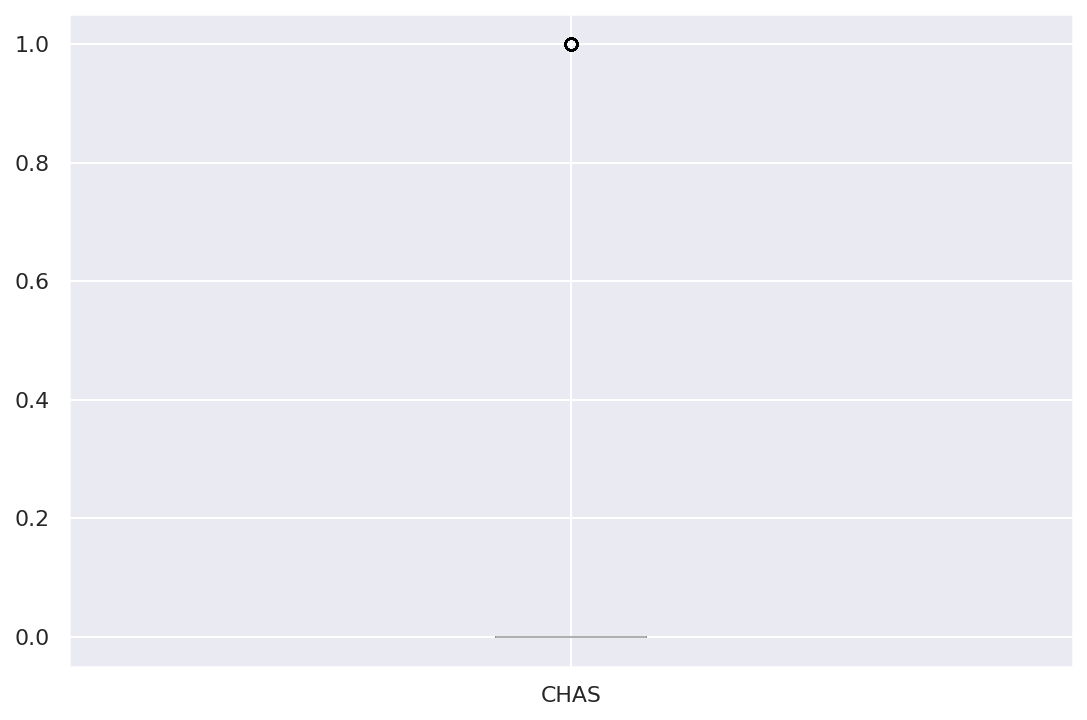

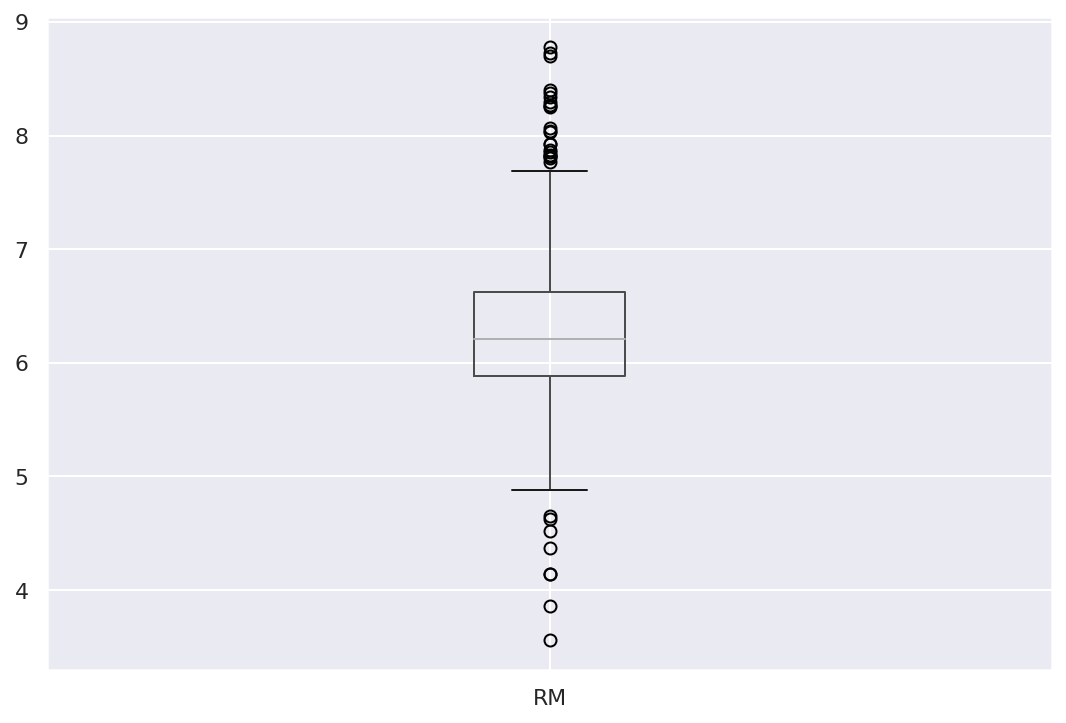

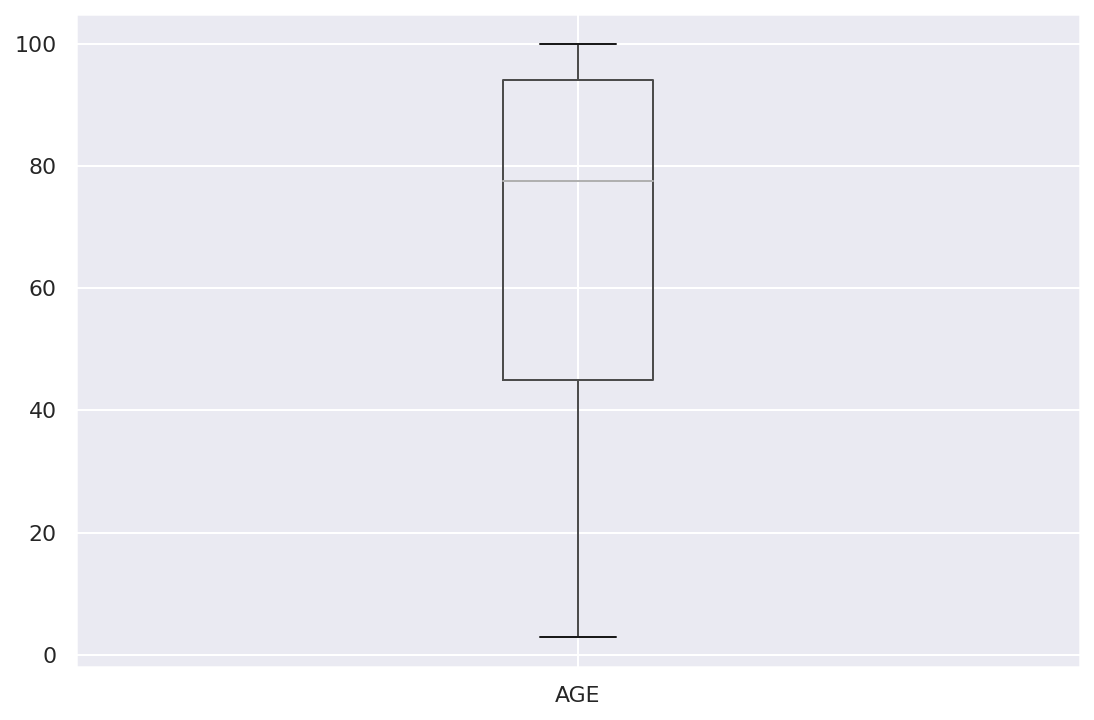

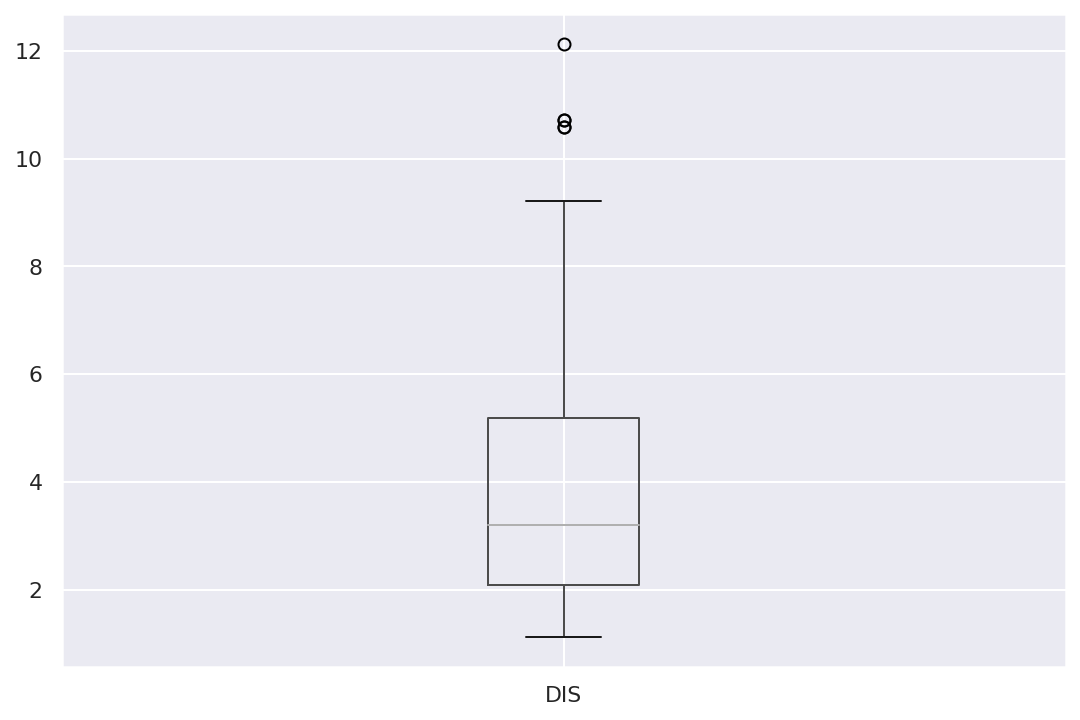

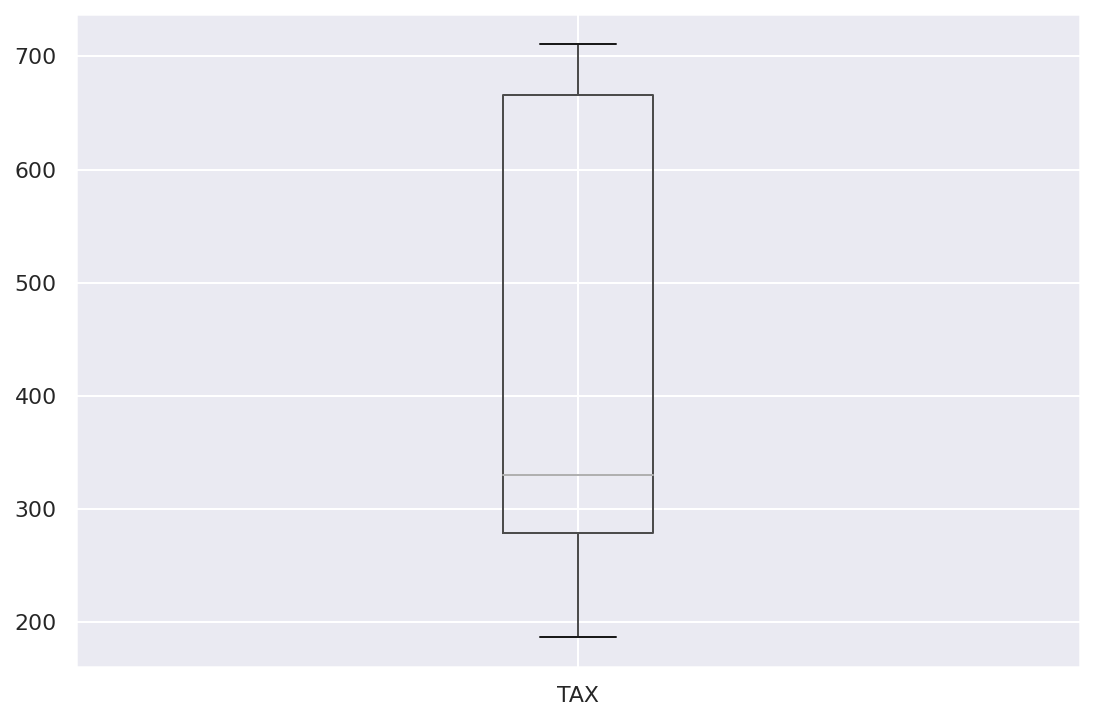

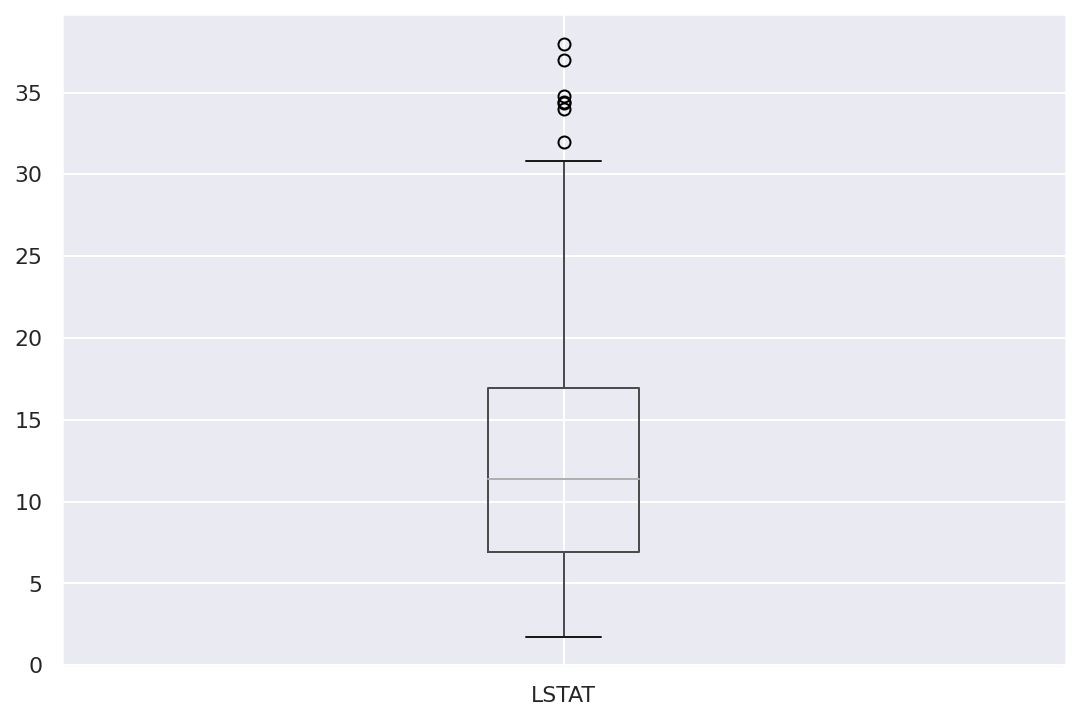

In [155]:
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

---
### Building and exploring categorical features
---
#### Activity
Creating categorical fields from continuous variables and making segmented visualizations

---
_Note: the following code should be removed from the student version of the notebook and replaced with empty cells._

(0.0, 100.0)

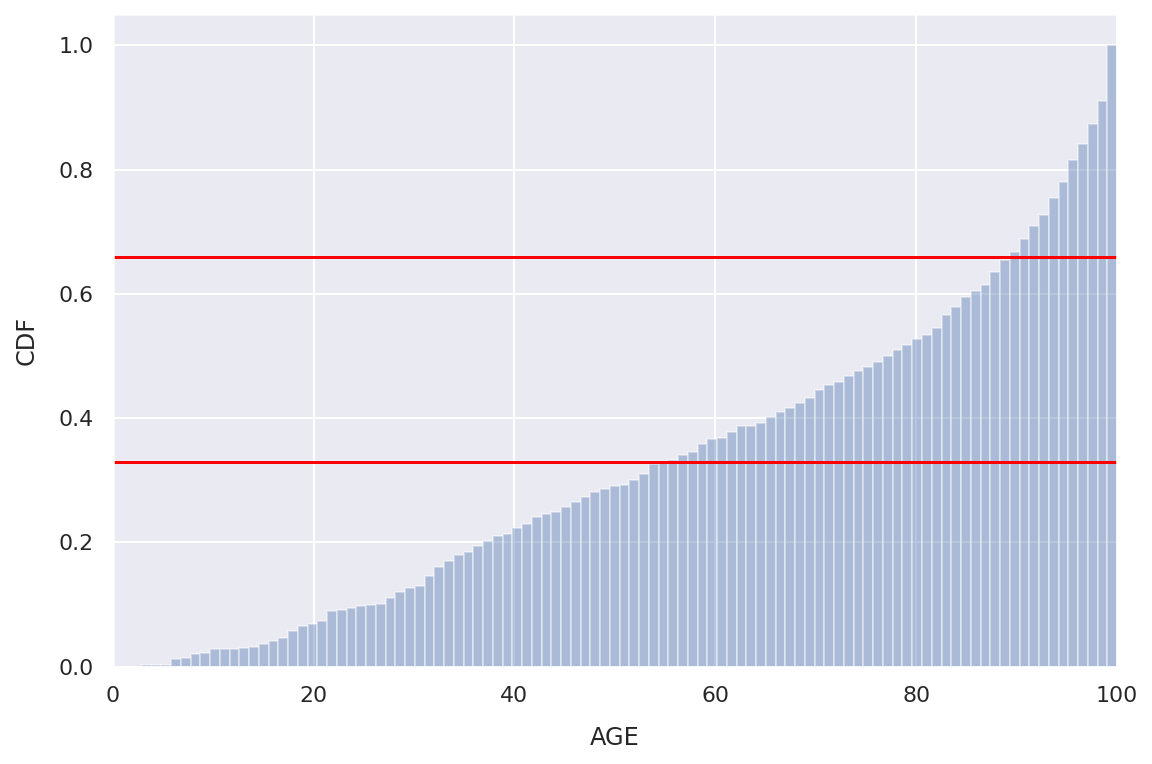

In [156]:
# Plot cumulative distribution to find places to split data

sns.distplot(df.AGE.values, bins=100, hist_kws={'cumulative': True}, kde_kws={'lw': 0})
plt.xlabel('AGE')
plt.ylabel('CDF')
plt.axhline(0.33, color='red')
plt.axhline(0.66, color='red')
plt.xlim(0, df.AGE.max())


In [157]:
# Categorize AGE into 3 bins

def get_age_category(x):
    if x < 50:
        return 'Relatively New'
    elif 50 <= x < 85:
        return 'Relatively Old'
    else:
        return 'Very Old'

df['AGE_category'] = df.AGE.apply(get_age_category)

In [158]:
# Check the segmented counts
df.groupby('AGE_category').size()

AGE_category
Relatively New    147
Relatively Old    149
Very Old          210
dtype: int64

(0.0, 55.0)

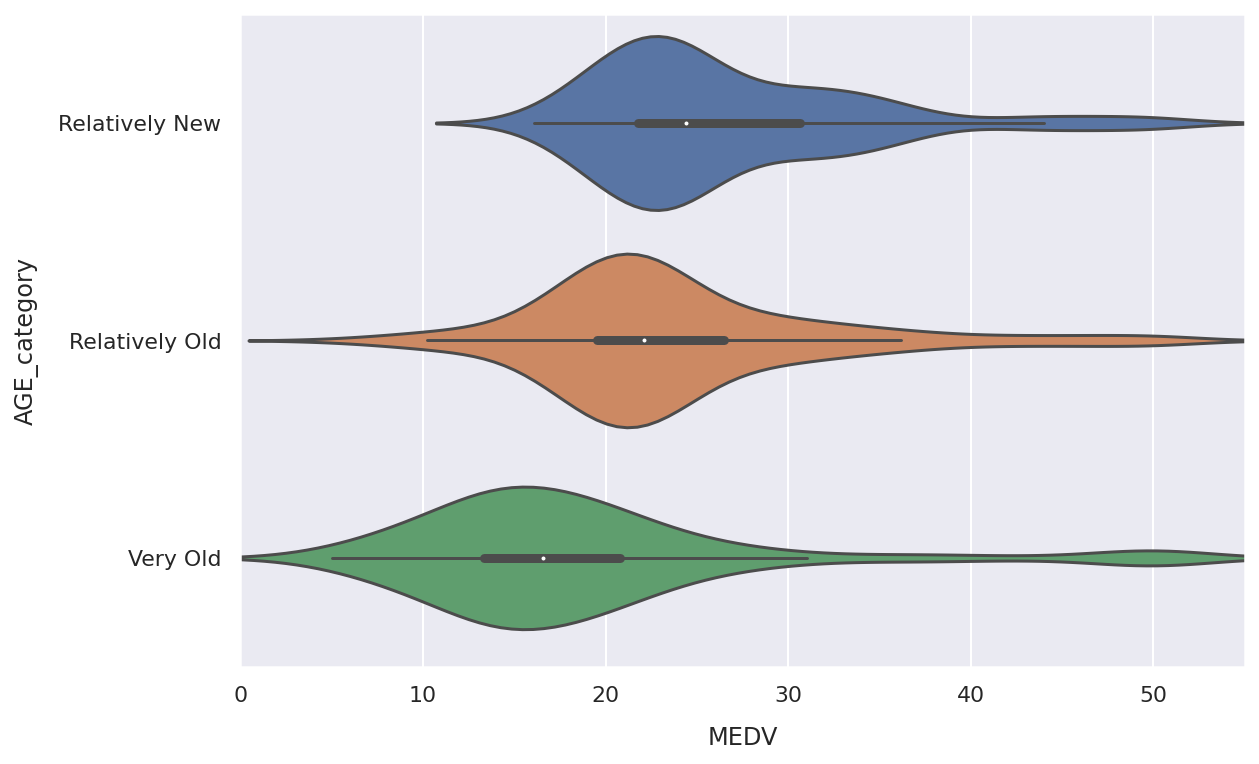

In [159]:
# How is MEDV distributed for each age category

sns.violinplot(x='MEDV', y='AGE_category', data=df,
               order=['Relatively New', 'Relatively Old', 'Very Old'])
plt.xlim(0, 55)


(0.0, 55.0)

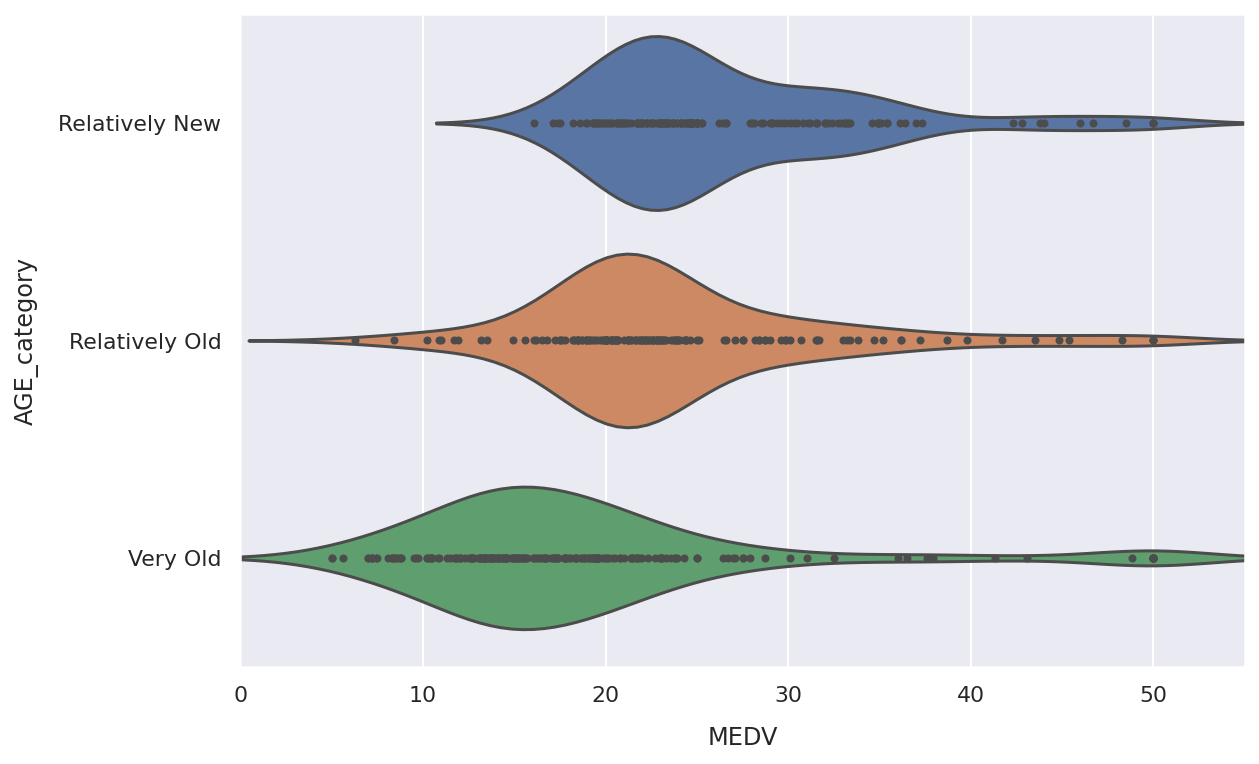

In [160]:
# Plotting the individual points

sns.violinplot(x='MEDV', y='AGE_category', data=df,
               order=['Relatively New', 'Relatively Old', 'Very Old'],
               inner='point')
plt.xlim(0, 55)


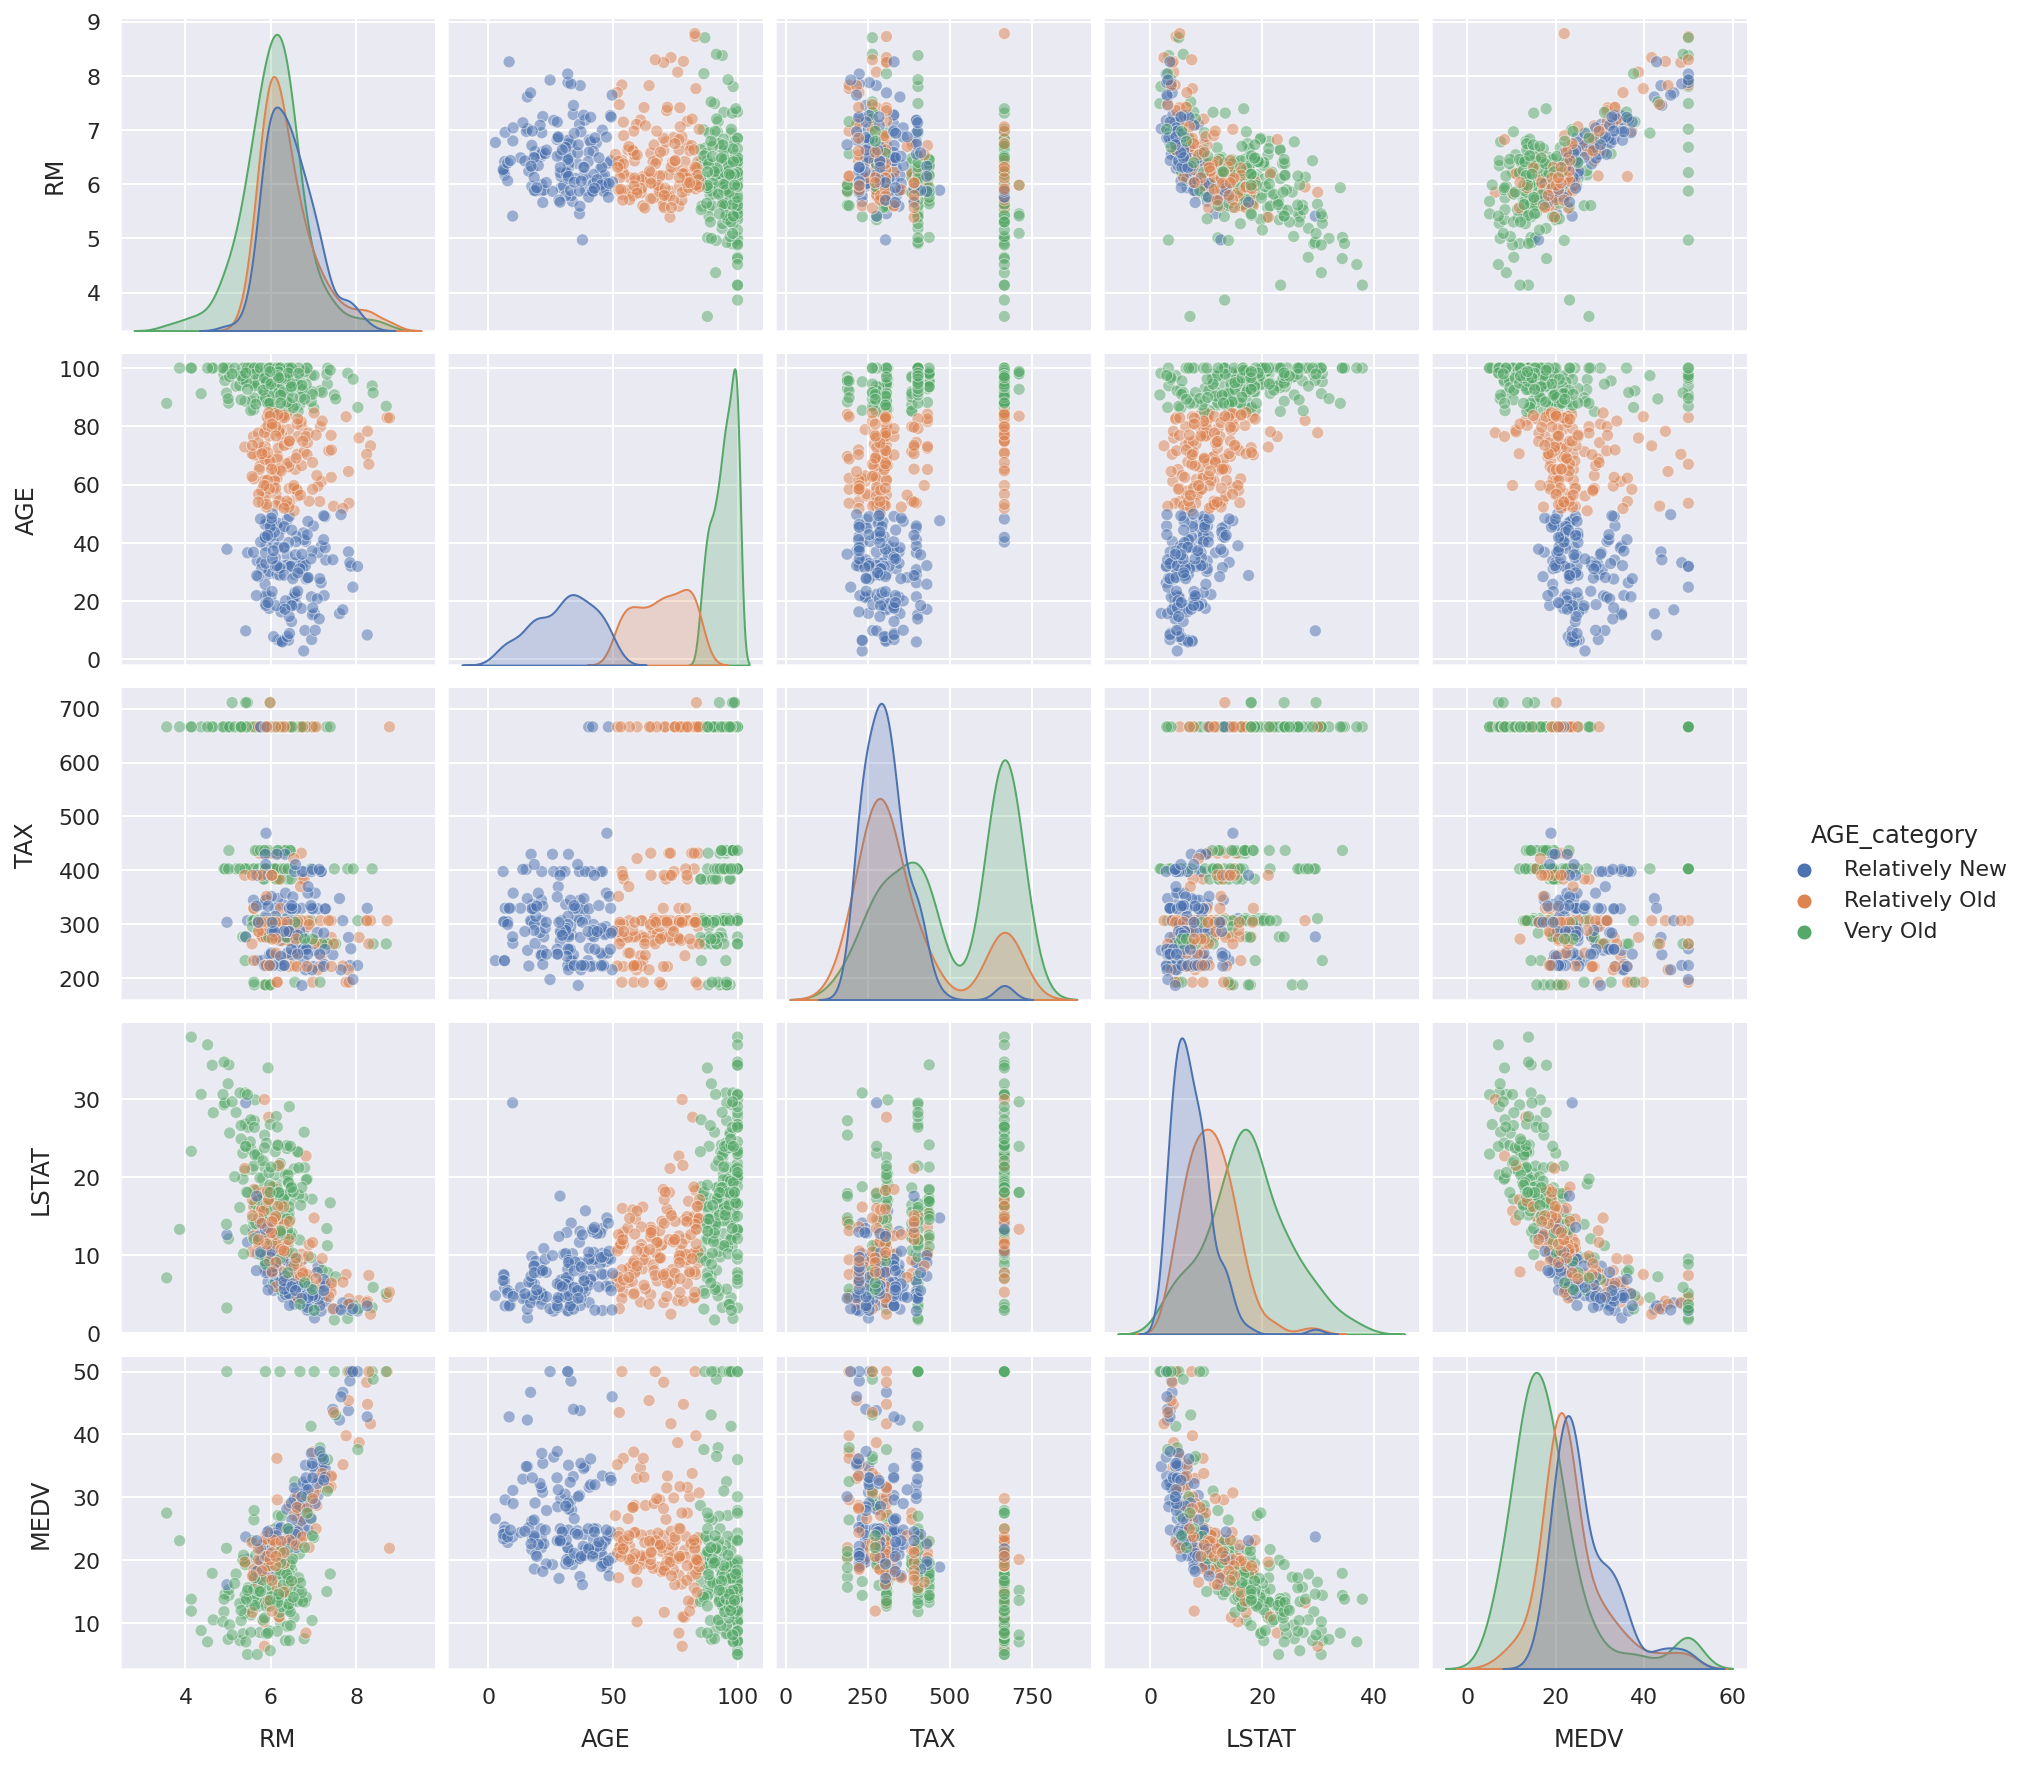

In [161]:
# Color-segmented pair plot

cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'MEDV', 'AGE_category']
sns.pairplot(df[cols], hue='AGE_category',
             hue_order=['Relatively New', 'Relatively Old', 'Very Old'],
             plot_kws={'alpha': 0.5})


(-5.0, 40.0)

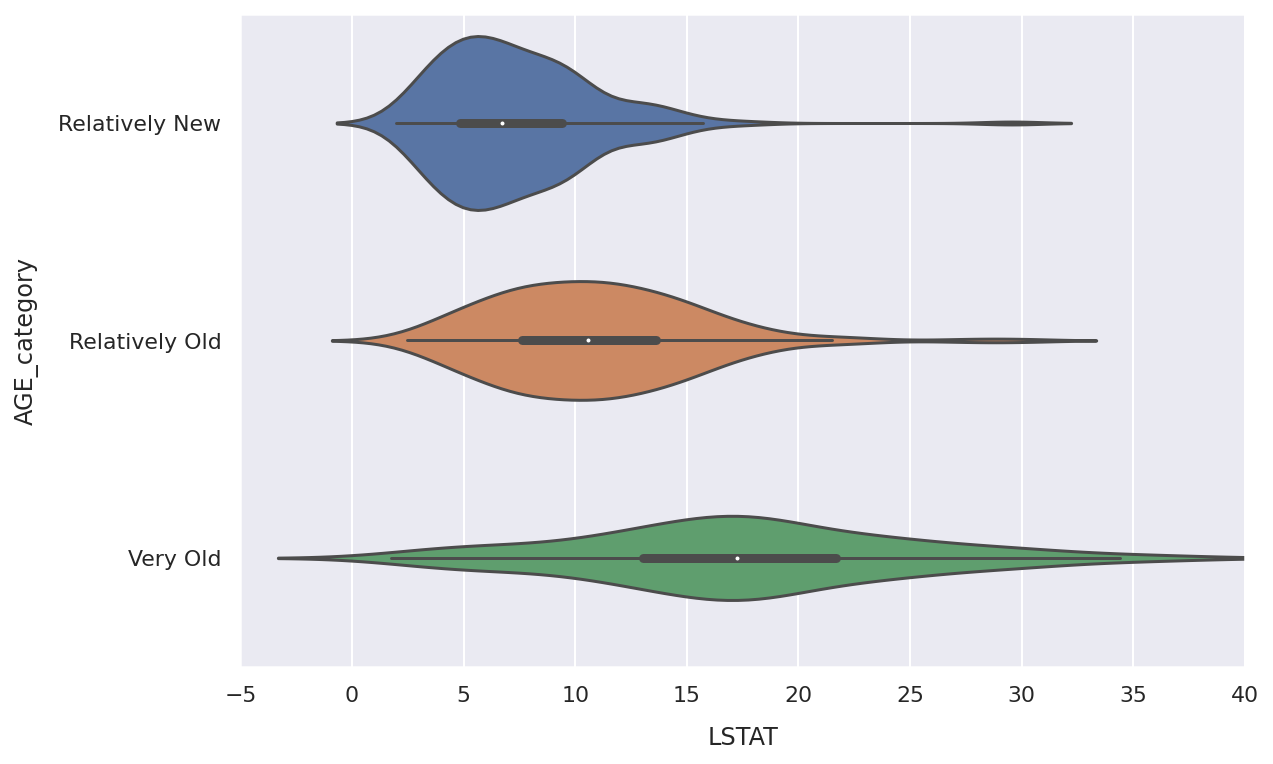

In [162]:
# Look at LSTAT by segment in more detail

sns.violinplot(x='LSTAT', y='AGE_category', data=df,
               order=['Relatively New', 'Relatively Old', 'Very Old'])
plt.xlim(-5, 40)

### Automated Exploratory Data Analysis (EDA)

#### Dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


DataPrep Report
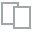
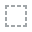
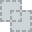
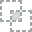
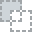
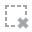
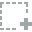
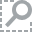
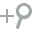
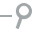
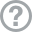
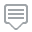
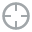
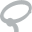
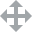
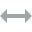
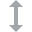
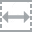
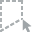
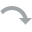
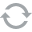
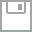
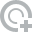
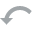
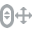
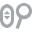
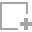
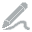
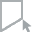
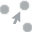
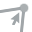
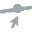

In [163]:
!pip install dataprep
from dataprep.eda import create_report
create_report(df)

#### Sweetviz 

In [164]:
!pip install sweetviz
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('report.html', open_browser=True)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### AutoViz

In [165]:
#!pip install autoviz
#from autoviz.AutoViz_Class import AutoViz_Class
#AV = AutoViz_Class()
#df_av = AV.AutoViz('xxxxxx.csv') #colocar url para dataset

---
### Fit a polynomial regression model 


---
_Note: the following code should be removed from the student version of the notebook and replaced with empty cells._

In [169]:
y = df['MEDV'].values
x = df['LSTAT'].values.reshape(-1,1)
print('x =')
print(x[:3], '...etc')

x =
[[4.98]
 [9.14]
 [4.03]] ...etc


In [170]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [171]:
x_poly = poly.fit_transform(x)
print('x_poly =')
print(x_poly[:3], '...etc')

x_poly =
[[  1.         4.98      24.8004   123.505992]
 [  1.         9.14      83.5396   763.551944]
 [  1.         4.03      16.2409    65.450827]] ...etc


In [172]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_poly, y)
x_0 = clf.intercept_ + clf.coef_[0] # intercept
x_1, x_2, x_3 = clf.coef_[1:]       # other coefficients
msg = 'model: y = {:.3f} + {:.3f}x + {:.3f}x^2 + {:.3f}x^3'\
        .format(x_0, x_1, x_2, x_3)
print(msg)

model: y = 48.650 + -3.866x + 0.149x^2 + -0.002x^3


In [173]:
y_pred = clf.predict(x_poly)
resid_MEDV = y - y_pred
print('residuals =')
print(resid_MEDV[:10], '...etc')

residuals =
[-8.84025736 -2.61360313 -0.65577837 -5.11949581  4.23191217 -3.56387056
  3.16728909 12.00336372  4.03348935  2.87915437] ...etc
